VIII Auswertung
==

In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import numpy as np
from numpy import exp, sqrt, log, pi
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy import odr
from scipy.integrate import quad
from scipy.signal import find_peaks
from scipy.signal import argrelextrema, argrelmin, argrelmax


def fehler(name, G, sig_G, G_lit, sig_G_lit):
    print(name)
    print('Relativer Fehler: ', sig_G / G * 100)
    print('Rel. Fehler (Vergleich):', sig_G_lit / G_lit * 100)
    print('Absoluter Fehler: ', G - G_lit)
#    print('Verhältnis:', G / G_lit)
    print('Sigma-Abweichung: ', np.abs(G - G_lit) / sqrt(sig_G ** 2 
                                                         + sig_G_lit ** 2),'\n')
    
    
def fehler_small(name, G, sig_G):
    print(name)
    print('Relativer Fehler: ', sig_G / G * 100)
    

def ergebnis(name, G, sig_G, komma, einheit):
    print(name + ' =', np.round(G, komma), '+/-', np.round(sig_G, komma), einheit)
    

def fitparameter(name, G, sig_G, komma, einheit):
    return name + ' =' + str(np.round(G, komma)) + '$\pm$' + str(np.round(sig_G, komma)) + einheit

VIII.1 Quantitative Beobachtungen am Einfachspalt
--

Eichung
--

In [2]:
# Messdaten
px = np.array([384, 476, 576, 678, 786]) # Lage in Pixels
sig_px = 10 * np.ones(5)
mm = 2 * np.array([2.05, 1.81, 1.60, 1.45, 1.20]) # Öffnung in mm
sig_mm = 0.02 * np.ones(5)

Es wird der mittlere Abstand zwischen Minima bestimmt

In [3]:
# Minima
min_ord = np.array([0.5, 1.5, 2.5, 3.5, 4.5]) + 0.5
min_lage = np.array([997, 1096, 1198, 1295, 1394])
Delta_min = np.array([min_lage[i + 1] - min_lage[i] for i in range(4)])
Delta_min_mean = np.mean(Delta_min)
sig_Delta_min_mean = 1 / sqrt(len(Delta_min) - 1) * np.std(Delta_min)

# Maxima
max_ord = np.array([0, 1, 2, 3, 4, 5])
max_lage = np.array([897, 1032, 1142, 1250, 1342, 1436])
Delta_max = np.array([max_lage[i] - max_lage[i + 1] for i in range(4)])

sig_ext = 10


ergebnis('Delta_min_mean', Delta_min_mean, sig_Delta_min_mean, 0, '[px]')

Delta_min_mean = 99.0 +/- 1.0 [px]


In [4]:
# Fit: Lage gegen Spaltbreite
def line(p, x):
    return p[0] * x + p[1]


quad_model = odr.Model(line)
data = odr.RealData(px, mm, sx = sig_px, sy = sig_mm)
out = odr.ODR(data, quad_model, beta0 = [2., 1.]).run()
popt = out.beta
sig_popt = out.sd_beta
m = popt[0]
b = popt[1]
sig_m = sig_popt[0]
sig_b = sig_popt[1]


ergebnis('Steigung: m', m, sig_m, 4, '[mm px^-1]')
ergebnis('Achsenabschnitt: n', b, sig_b, 2, '[mm]')

Steigung: m = -0.0041 +/- 0.0002 [mm px^-1]
Achsenabschnitt: n = 5.63 +/- 0.12 [mm]


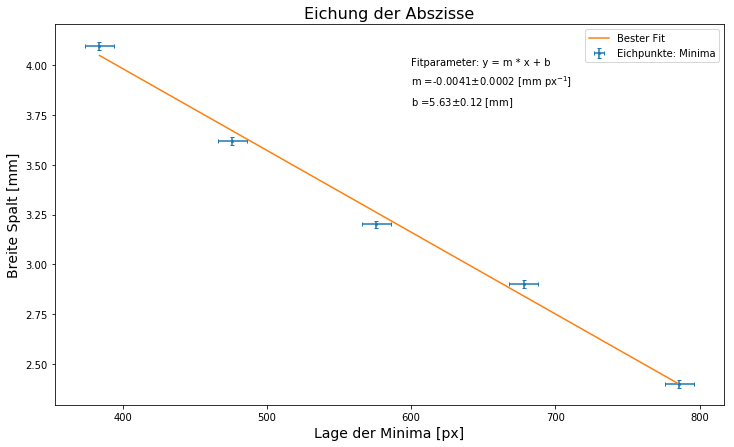

In [5]:
# Plot
plt.figure(figsize = (12, 7))
plt.errorbar(px, mm, xerr = sig_px, yerr = sig_mm, fmt = '.', markersize = 4, 
             capsize = 2, label = 'Eichpunkte: Minima')
plt.plot(px, line(popt, px), label = 'Bester Fit')
plt.title('Eichung der Abszisse', size = 16)
plt.xlabel('Lage der Minima [px]', size = 14)
plt.ylabel('Breite Spalt [mm]', size = 14)
plt.text(600, 4, 'Fitparameter: y = m * x + b')
plt.text(600, 3.9, fitparameter('m', m, sig_m, 4, ' [mm px$^{-1}$]'))
plt.text(600, 3.8, fitparameter('b', b, sig_b, 2, ' [mm]'))
plt.legend(loc = 'best')

plt.savefig('images/233/V233Diagramm1.png')

Auswertung der Beugungsstrukturen
--

Es werden die Lagen der Minima gegen ihre Beugungsordnung aufgetragen

In [6]:
# Fit: Lage gegen Minima
quad_model = odr.Model(line)
data = odr.RealData(min_ord, min_lage, sy = sig_ext)
out = odr.ODR(data, quad_model, beta0 = [2., 1.]).run()
popt_2 = out.beta
sig_popt_2 = out.sd_beta
m_2 = popt_2[0]
b_2 = popt_2[1]
sig_m_2 = sig_popt_2[0]
sig_b_2 = sig_popt_2[1]


ergebnis('Steigung: m_2', m_2, sig_m_2, 1, '[px / Ordnung]')
ergebnis('Achsenabschnitt: b_2', b_2, sig_b_2, 1, '[px]')

Steigung: m_2 = 99.3 +/- 0.4 [px / Ordnung]
Achsenabschnitt: b_2 = 898.1 +/- 1.4 [px]


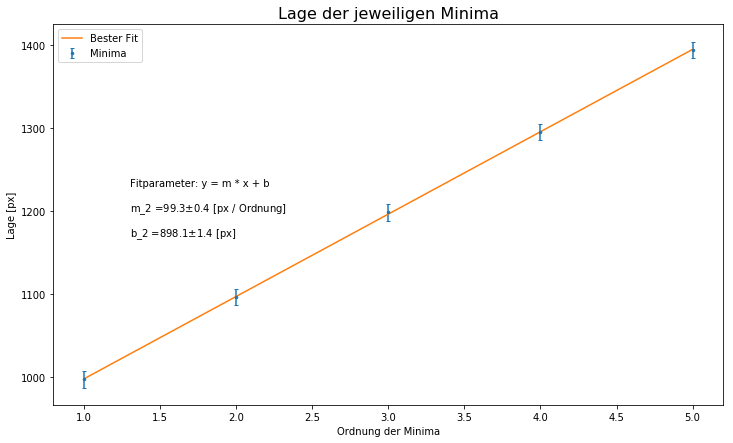

In [7]:
# Plot
plt.figure(figsize = (12, 7))
plt.errorbar(min_ord, min_lage, yerr = sig_ext, fmt = '.', markersize = 5,
             capsize = 2, label = 'Minima')
plt.plot(min_ord, line(popt_2, min_ord), label = 'Bester Fit')
plt.title('Lage der jeweiligen Minima', size = 16)
plt.xlabel('Ordnung der Minima')
plt.ylabel('Lage [px]')
plt.text(1.3, 1230, 'Fitparameter: y = m * x + b')
plt.text(1.3, 1200, fitparameter('m_2', m_2, sig_m_2, 1, ' [px / Ordnung]'))
plt.text(1.3, 1170, fitparameter('b_2', b_2, sig_b_2, 1, ' [px]'))
plt.legend()

plt.savefig('images/233/V233Diagramm2.png')


In [8]:
# Maxima
n = (max_lage - b_2) / m_2
sig_n = sqrt((sig_ext / b_2) ** 2 + (sig_b_2 / m_2) ** 2 
             + ((n * sig_m_2) / m_2) ** 2)

npi = n * pi
sig_npi = sig_n * pi

npi_lit = np.array([(n + 0.5) * pi - 1 / ( (n + 0.5) * pi ) for n in range(6)])
sig_npi_lit = 0.01 * npi_lit
npi_lit[0] = 0

print('Maxima n:', np.round(n, 2))
print('      +/-', np.round(sig_n, 3))

print('Maxima npi:', np.round(npi, 2))
print('        +/-', np.round(sig_npi, 3))

print('Maxima npi_lit:', np.round(npi_lit, 2))
print('            +/-', np.round(sig_npi_lit, 3))

Maxima n: [-0.01  1.35  2.46  3.54  4.47  5.42]
      +/- [0.018 0.019 0.02  0.023 0.026 0.029]
Maxima npi: [-0.03  4.24  7.72 11.13 14.04 17.02]
        +/- [0.056 0.058 0.064 0.072 0.081 0.09 ]
Maxima npi_lit: [ 0.    4.5   7.73 10.9  14.07 17.22]
            +/- [0.009 0.045 0.077 0.109 0.141 0.172]


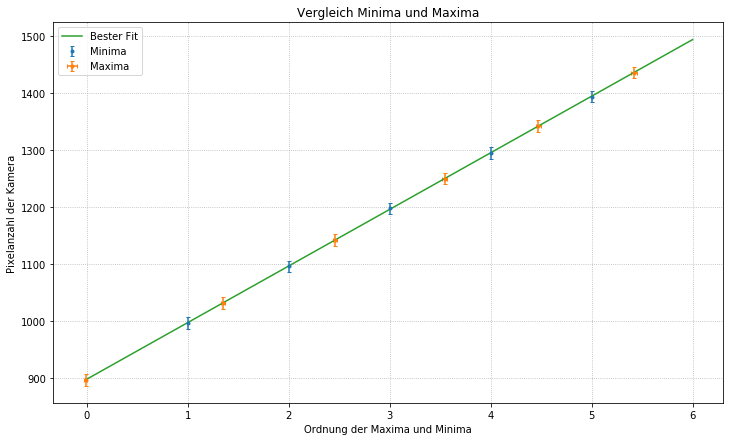

In [9]:
# Plot mit Maxima und Minima
plt.figure(figsize = (12, 7))
max_ord = np.arange(0, 7, 1)
plt.errorbar(min_ord, min_lage, yerr = sig_ext, fmt = '.', capsize = 2,
             label = 'Minima')
plt.errorbar(n, max_lage, xerr = sig_n, yerr = sig_ext, fmt = '.', capsize = 2,
             label = 'Maxima')
plt.plot(max_ord, line(popt_2, max_ord), label = 'Bester Fit')
plt.xlabel('Ordnung der Maxima und Minima')
plt.ylabel('Pixelanzahl der Kamera')
plt.title('Vergleich Minima und Maxima')
plt.legend()
plt.grid(linestyle = 'dotted')

plt.savefig('images/233/V233Diagramm3.png')



Spaltbreite
---

In [10]:
# Werte
lambda_k = 635e-9 # m
f = 0.08

In [11]:
# Minima gegen Abstand
min_lage_2 = min_lage * m
sig_ext_2 = min_lage_2 * sqrt((sig_ext / min_lage) ** 2 + (sig_m / m) ** 2)

# Fit
quad_model = odr.Model(line)
data = odr.RealData(min_lage_2, min_ord ,sx=sig_ext_2)
out = odr.ODR(data, quad_model, beta0=[2., 1.]).run()
popt_3 = out.beta
sig_popt_3 = out.sd_beta

m_3 = popt_3[0]
b_3 = popt_3[1]
sig_m_3 = sig_popt_3[0]
sig_b_3 = sig_popt_3[1]

Steigung m_3 = -2.447 +/- 0.01 [mm / Ordnung]


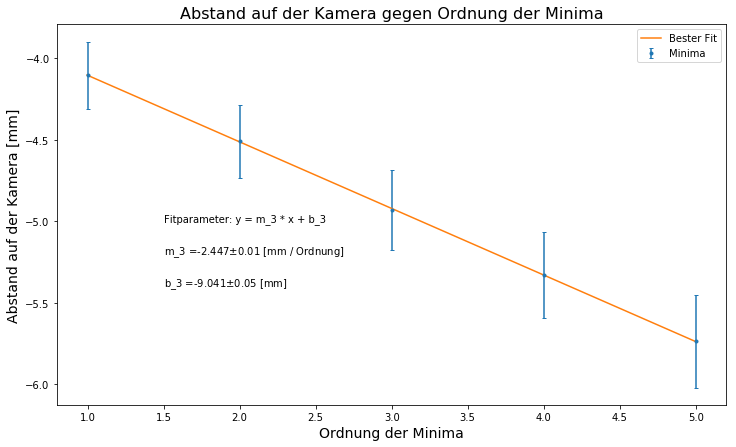

In [12]:
# Plot
plt.figure(figsize = (12, 7))
plt.errorbar(min_ord, min_lage_2, yerr = sig_ext_2, fmt = '.', capsize = 2, 
             label = 'Minima')
plt.plot(line(popt_3, min_lage_2), min_lage_2, label = 'Bester Fit')
plt.xlabel('Ordnung der Minima', size = 14)
plt.ylabel('Abstand auf der Kamera [mm]', size = 14)
plt.title('Abstand auf der Kamera gegen Ordnung der Minima', size = 16)
plt.text(1.5, -5, 'Fitparameter: y = m_3 * x + b_3')
plt.text(1.5, -5.2, fitparameter('m_3', m_3, sig_m_3, 3, ' [mm / Ordnung]'))
plt.text(1.5, -5.4, fitparameter('b_3', b_3, sig_b_3, 3, ' [mm]'))
plt.legend()

plt.savefig('images/233/V233Diagramm4.png')


ergebnis('Steigung m_3', m_3, sig_m_3, 3, '[mm / Ordnung]')

In [13]:
# Berechnung der Spaltbreite
b_S = lambda_k * f / np.abs(m_3) 
sig_b_S = lambda_k * f * np.abs(sig_m_3) / m_3 ** 2

ergebnis('Spaltbreite b_S', 1e10 * b_S, 1e10 * sig_b_S, 1, '[10^-7 m]')

Spaltbreite b_S = 207.6 +/- 0.9 [10^-7 m]


Intensitätsverhältnisse
---

In [14]:
# Messdaten
#               Max 0   Max 1
I_1 = np.array([0.9672, 0.0867]) # Einheiten ?
#               Max 1   Max 2   Max 3   Max 4   Max 5  
I_2 = np.array([0.8746, 0.2990, 0.1496, 0.1000, 0.0804])
sig_I = 0.010
Ug = 0.006
sig_Ug = 0.001

# Angepasst auf Untergrund
I_1_u = I_1 - Ug
I_2_u = I_2 - Ug
sig_I_u = sqrt(sig_I ** 2 + sig_Ug ** 2)

# Intensitätsverhältnis
# v_i = I_i / I_0

v = I_1_u / I_1_u[0]
sig_v = np.array([v[i] * sqrt( (sig_I_u / I_1_u[i]) 
                              + (sig_I_u / I_1_u[0]) ** 2 ) for i in range(2)])

w = v[1] * I_2_u / I_2_u[0]
sig_w = np.array([w[i] * sqrt( (sig_I_u / I_2_u[i]) 
                              + (sig_I_u / I_2_u[0]) ** 2 ) for i in range(5)])

# Experimentelle Werte
vw = np.append(v, w[1:])
sig_vw = np.append(sig_v, sig_w[1:])

# Theoretische Werte
vw_theo = np.sinc(npi_lit / pi) ** 2
sig_vw_theo = np.abs(2 / pi * (np.cos(npi_lit / pi) / (npi_lit / pi) 
                               - np.sin(npi_lit / pi) / (npi_lit / pi) ** 2 ) 
                     * np.sin(npi_lit / pi) / (npi_lit / pi) * sig_npi_lit)


print('\nExperimentell:')
print('Verhältnis vw:', np.round(vw, 4))
print('           +/-', np.round(sig_vw, 4))

print('\nTheoretisch:')
print('Verhältnis vw_theo:', np.round(vw_theo, 4))
print('                +/-', np.round(sig_vw_theo, 4))


Experimentell:
Verhältnis vw: [1.     0.084  0.0283 0.0139 0.0091 0.0072]
           +/- [0.1028 0.0296 0.0053 0.0037 0.003  0.0026]

Theoretisch:
Verhältnis vw_theo: [1.     0.0472 0.0165 0.0083 0.005  0.0034]
                +/- [   nan 0.0077 0.0053 0.0016 0.0001 0.0022]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


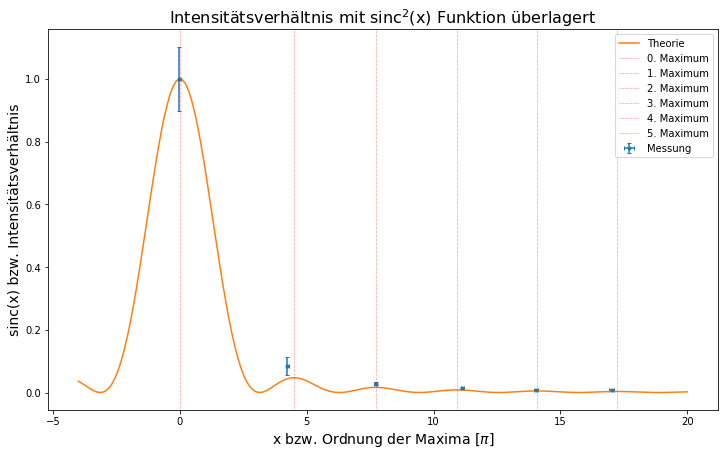

In [15]:
# Plot
x = np.linspace(-4,20,200)

def axvline(x):
    for i in range(len(x)):
        plt.axvline(x[i], linewidth = 0.5, color = 'r', linestyle = 'dotted', 
                    label = str(i) + '. Maximum')

plt.figure(figsize = (12, 7))
plt.errorbar(npi, vw, fmt = '.', yerr = sig_vw, xerr = sig_npi, capsize = 2, 
             label='Messung') 
plt.plot(x, np.sinc(x / pi) ** 2, label = "Theorie")
plt.title('Intensitätsverhältnis mit sinc$^2$(x) Funktion überlagert', size = 16)
plt.xlabel('x bzw. Ordnung der Maxima [$\pi$]', size = 14)
plt.ylabel('sinc(x) bzw. Intensitätsverhältnis', size = 14)
axvline(npi_lit)
plt.legend(loc = 'upper right')

plt.savefig('images/233/V233Diagramm5.png')

VIII.2 Beugungstruktur des Doppelspaltes
--

Doppelspalt und Einhüllende
--

In [16]:
# Messwerte
d = 409 # Px
sig_d = 10
b = 136
sig_b = 10

vbd = d / b
sig_vbd = sqrt( (sig_d / b) ** 2 + (d * sig_b / b ** 2) ** 2 )

ergebnis('Verhältnis vbd', vbd, sig_vbd, 2, '')

Verhältnis vbd = 3.01 +/- 0.23 


In [17]:
## Theoretisches Beugungsbild ##
# Beugungsfunktion Spalt
def beugung_spalt(x): 
    return np.sinc(x) ** 2


# Beugungsfunktion Doppelspalt
def beugung_doppelspalt(x):
    return np.sinc(x) ** 2 * np.cos(pi * vbd * x) ** 2

Intensitätsverhältnisse
--

In [18]:
# Messdaten
#                Max 0   Max 1
ID_1 = np.array([0.9445, 0.644])
#                Max 1  Max 2   Max 3  Max 4  Max 5
ID_2 = np.array([0.954, 0.1248, 0.062, 0.066, 0.038])

# Angepasst auf Untegrund
ID_1_u = ID_1 - Ug
ID_2_u = ID_2 - Ug

# Fehler gleich wie beim Einzelspalt

# Intensitätsverhältnisse
vD = ID_1_u / ID_1_u[0]
sig_vD = np.array([vD[i] * sqrt( (sig_I_u / ID_1_u[i]) 
                              + (sig_I_u / ID_1_u[0]) ** 2 ) for i in range(2)])

wD = vD[1] * ID_2_u / ID_2_u[0]
sig_wD = np.array([wD[i] * sqrt( (sig_I_u / ID_2_u[i]) 
                              + (sig_I_u / ID_2_u[0]) ** 2 ) for i in range(5)])


# Experimentelle Werte
vwD = np.append(vD, wD[1:])
sig_vwD = np.append(sig_vD, sig_wD[1:])

'''
Die Bestimmung der theoretischen Werten erfolgt durch eine Suche der Maxima 
aus dem Datenset des Kurvenverlaufs
'''
a = 2
x_values2 = np.linspace(- (a + 1),a + 1, 400)
y_values2 = beugung_doppelspalt(x_values2) # Wir suchen sie in diesem Intervall

maxima, _ = find_peaks(beugung_doppelspalt(x_values2), height = 0.01, prominence = 0.01)
npiD_lit = x_values2[maxima[6:-1]]

# Theoretische Werte
vwD_theo = np.sinc(npiD_lit) ** 2 * np.cos(pi * vbd * npiD_lit) ** 2
sig_vwD_theo = 1 / 200

print('\nExperimentell:')
print('Verhältnis vwD:', np.round(vwD, 4))
print('           +/-', np.round(sig_vwD, 4))

print('\nTheoretisch:')
print('Verhältnis vwD_theo:', np.round(vwD_theo, 3), '+/-', sig_vwD_theo)



Experimentell:
Verhältnis vwD: [1.     0.6798 0.0852 0.0402 0.043  0.0229]
           +/- [0.104  0.0856 0.0248 0.017  0.0176 0.0129]

Theoretisch:
Verhältnis vwD_theo: [0.995 0.695 0.192 0.043 0.029 0.014] +/- 0.005


Graphische Darstellung
--

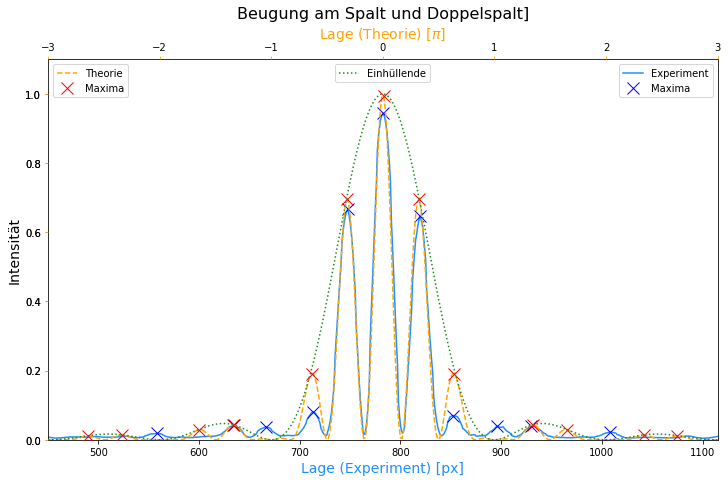

In [19]:
# Ablesen von experimentellem Bild
file = open('data/233/Messung1Doppelspalte.jdx', 'r')

for line in range(20): # Get rid of first lines
    _ = file.readline()
    

newintensity = np.array([])
    
    
'''
Wir entnehmen den Zeilen die einzelnen Einträgen und fügen sie in
ein einzelnes array
'''

for line in file:
    newline = np.array([])

    
    line = line.strip('\n')
    line = line.split()
    
    line = line[1:-1]
    
    for i in line:
        newline = np.append(newline, float(i))
    
    newintensity = np.append(newintensity, newline)
    
'''
Wir definieren die Koordinaten neu
'''

newx = np.arange(1792)    
newintensity = 1e-6 * newintensity

# Plot
pixel = newx
intensity = newintensity

x_values1 = pixel
y_values1 = intensity


'''
Kleiner Exkurs: Wir bestimmen die Maxima des Theoretischen Beugungsbilds
'''


maxima_exp, _ = find_peaks(intensity, prominence = 0.01, height = 0.01)
nD_exp = pixel[maxima_exp]




fig = plt.figure(figsize = (12, 7))
plt.title('Beugung am Spalt und Doppelspalt]\n\n', size = 16)
plt.plot(x_values2, beugung_spalt(x_values2), label = 'Einhüllende Einzelspalt') 
plt.axis('off')

ax = fig.add_subplot(111, label = "1")
ax2 = fig.add_subplot(111, label = "2", frame_on = False)
ax3 = fig.add_subplot(111, label = '3', frame_on = False)

ax.plot(x_values1, y_values1, label = 'Experiment', color = 'dodgerblue')
ax.plot(nD_exp, intensity[maxima_exp], 'x', markersize = 12, color = 'blue',
         label = 'Maxima')
ax.set_xlabel('Lage (Experiment) [px]', size = 14, color = 'dodgerblue')
ax.set_ylabel('Intensität', size = 14)
ax.set_ylim([0, 1.1])
ax.set_xlim([450, 1115])
ax.xaxis.tick_bottom()
#ax.tick_params(axis = 'x', color = 'cornflowerblue')
ax.tick_params(axis = 'y', color = 'cornflowerblue')
ax.legend()

ax2.plot(x_values2, y_values2, color = 'orange', label = 'Theorie', linestyle = '--')
ax2.plot(x_values2[maxima], beugung_doppelspalt(x_values2[maxima]), 'x', markersize = 12, color = 'red',
         label = 'Maxima')
ax2.set_ylim([0, 1])
ax2.xaxis.tick_top()
ax2.set_xlabel('Lage (Theorie) [$\\pi$]', color = 'orange', size = 14)      
ax2.xaxis.set_label_position('top') 
ax2.tick_params(axis = 'x', color = 'orange')
ax2.tick_params(axis = 'y', color = 'orange')
ax2.set_ylim((0, 1.1))
ax2.set_xlim((-3,3))
ax2.legend(loc = 'upper left')
ax3.plot(x_values2, beugung_spalt(x_values2), color = 'forestgreen', label = 'Einhüllende', linestyle = 'dotted')
ax3.legend(loc = 'upper center')
ax3.set_ylim((0, 1.1))
ax3.set_xlim((-3, 3))

#ax2.axis('off')
ax3.axis('off')

fig = plt.savefig('images/233/V233Diagramm6.png')

VIII.3 Fouriersynthese des Beugungsbildes
---

Spaltbreite
---

In [20]:
# Bildgrösse
B = 136 # px
sig_B = sqrt(2 * 5 ** 2)
# Bildweite
b = 0.78 # m
sig_b = 0.04 
# Brennweite
f = 0.08 # m

# Gegenstandsgrösse
G = B / ( b / f - 1 )
sig_G = sqrt( (sig_B / ( b / f - 1 )) ** 2 
             + (B * sig_b / ((b / f - 1) ** 2 * f)) ** 2 )


ergebnis('Spaltbreite G', G, sig_G, 2, '[px]')

# Pixel entspricht 14 * 10^-6 m
G_m = 14 * G
sig_G_m = 14 * sig_G
ergebnis('Spaltbreite G_m', G_m, sig_G_m, 0, '[10^-6 m]')

Spaltbreite G = 15.54 +/- 1.2 [px]
Spaltbreite G_m = 218.0 +/- 17.0 [10^-6 m]


Intensitätsverhältnisse: Experimentell
--

In [21]:
#Als nächstes werden die Kurvenverläufe der Intensitäten aufgetragen. 
#Nicht vorhanden ist der Verlauf zu n = 3, daher werden die Messwerten 
#dem Messprotokoll entnommen.

In [22]:
## Befehle
# Abstände der Wiggles
def abstand(maxima):
    pos = np.array([])
    if len(maxima) < 2:
        True
    else:
        for i in range(len(maxima) - 1):
            pos = np.append(pos, maxima[i+1] - maxima[i])
    global dist, sig_dist
    dist = np.mean(pos)
    sig_dist = 1 / sqrt(len(maxima)) * np.std(pos)
    
    print('Abstand zwischen Maxima:')
    print(pos)
    print('\nMittlerer Abstand')
    print(np.round(dist, 3), '+/-', np.round(sig_dist, 3), '[px]')
    
    return dist, sig_dist

def abstand_min(minima):
    pos = np.array([])
    if len(minima) < 2:
        True
    else:
        for i in range(len(minima) - 1):
            pos = np.append(pos, minima[i+1] - minima[i])
    global dist_min, sig_dist_min
    dist_min = np.mean(pos)
    sig_dist_min = 1 / sqrt(len(minima)) * np.std(pos)
    
    print('Abstand zwischen Minima:')
    print(pos)
    print('\nMittlerer Abstand')
    print(np.round(dist_min, 3), '+/-', np.round(sig_dist_min, 3), '[px]')
    
    return dist_min, sig_dist_min


def intensitaet(intensity, maxima):
    print('')
    I_list = np.array([])
    for i in range(len(maxima)):
        print('Intensität der ' + str(i + 1) + '. Maxima:', 
              np.round(intensity[maxima[i]], 4))
        I_list = np.append(I_list, intensity[maxima[i]])
    return I_list

def intensitaet_min(intensity, minima):
    print('')
    I_list = np.array([])
    for i in range(len(minima)):
        print('Intensität der ' + str(i + 1) + '. Minima:', 
              np.round(intensity[minima[i]], 4))
        I_list = np.append(I_list, intensity[minima[i]])
    return I_list


Intensität der 1. Maxima: 1.0


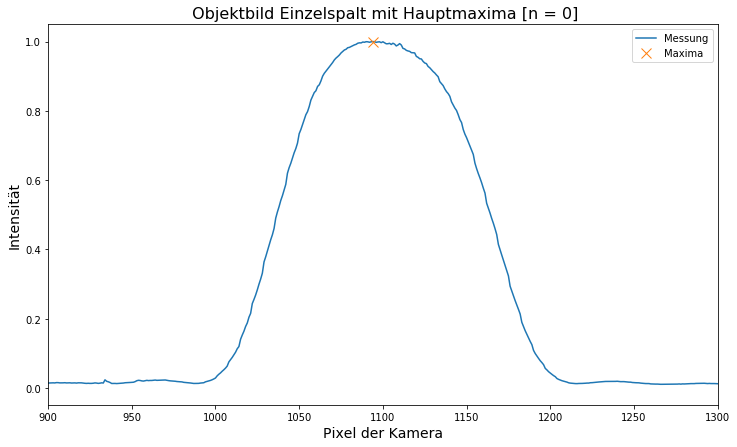

In [23]:
# n = 0
# Ablesen von experimentellem Bild
file0 = open('data/233/Messung3(b).jdx', 'r')

for line in range(20): # Get rid of first lines
    _ = file0.readline()
    

newintensity0 = np.array([])
    
    
'''
Wir entnehmen den Zeilen die einzelnen Einträgen und fügen sie in
ein einzelnes array
'''

for line in file0:
    newline = np.array([])

    
    line = line.strip('\n')
    line = line.split()
    
    line = line[1:-1]
    
    for i in line:
        newline = np.append(newline, float(i))
    
    newintensity0 = np.append(newintensity0, newline)
    
'''
Wir definieren die Koordinaten neu
'''

pixel0 = np.arange(1792)    
intensity0 = 1e-6 * newintensity0

I_0_max = np.max(intensity0)

intensity0 = intensity0 / I_0_max

maxima_exp0, _ = find_peaks(intensity0, height = 0.6, distance = 50)
#minima_exp1, _ = find_peaks(intensity1, height = (0.5, 0.61), distance = 10)


plt.figure(figsize = (12, 7))
plt.plot(pixel0[1:], intensity0[1:], label = 'Messung')
plt.title(' Objektbild Einzelspalt mit Hauptmaxima [n = 0]', size = 16)
plt.xlabel('Pixel der Kamera', size = 14)
plt.ylabel('Intensität', size = 14)
plt.plot(maxima_exp0, intensity0[maxima_exp0], 'x', markersize = 10, label = 'Maxima')
#plt.plot(minima_exp1, intensity1[minima_exp1], 'x', markersize = 10, label = 'Minima')
plt.xlim(900, 1300)
plt.legend()

plt.savefig('images/233/V233DiagrammIex0.png')
       

# Abstand zwischen Maxima
#dist, sig_dist = abstand(maxima_exp0)
# Intensität der Maxima, aufsteigend von links nach rechts
I_0_ex = intensitaet(intensity0, maxima_exp0)

Abstand zwischen Maxima:
[95.]

Mittlerer Abstand
95.0 +/- 0.0 [px]

Intensität der 1. Maxima: 0.9688
Intensität der 2. Maxima: 0.9685

Intensität der 1. Minima: 0.839


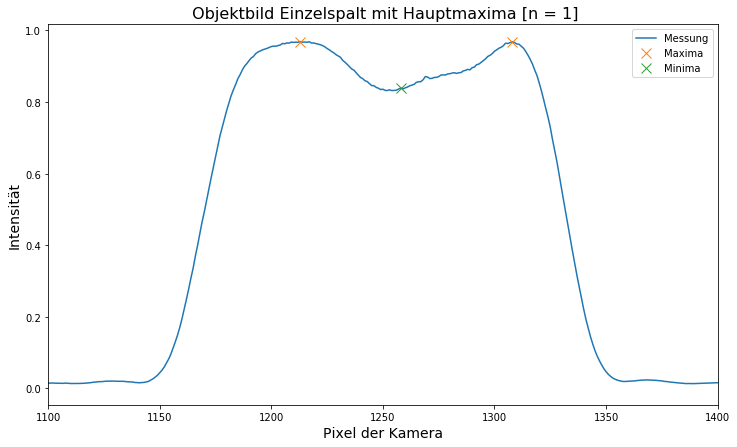

In [24]:
# n = 1
file1 = open('data/233/3n1.csv', 'r')

a1 = np.empty(2, float)

for line in file1:

    line = line.strip('\n')
    line = line.split(',')
    
    foo = float(line[0])
    bar = float(line[1])
    
    a1 = np.vstack([a1, [foo, bar]])

pixel1 = a1[:, 0]
intensity1 = a1[:, 1]

intensity1 = intensity1 / I_0_max

maxima_exp1, _ = find_peaks(intensity1, height = 0.6, distance = 50)
minima_exp1, _ = find_peaks(intensity1, height = (0.8, 0.85), distance = 30)


plt.figure(figsize = (12, 7))
plt.plot(pixel1[1:], intensity1[1:], label = 'Messung')
plt.title(' Objektbild Einzelspalt mit Hauptmaxima [n = 1]', size = 16)
plt.xlabel('Pixel der Kamera', size = 14)
plt.ylabel('Intensität', size = 14)
plt.plot(maxima_exp1, intensity1[maxima_exp1], 'x', markersize = 10, label = 'Maxima')
plt.plot(minima_exp1, intensity1[minima_exp1], 'x', markersize = 10, label = 'Minima')
plt.xlim(1100, 1400)
plt.legend()

plt.savefig('images/233/V233DiagrammIex1.png')
       

# Abstand zwischen Maxima
dist, sig_dist = abstand(maxima_exp1)
# Intensität der Maxima, aufsteigend von links nach rechts
I_1_ex_max = intensitaet(intensity1, maxima_exp1)

I_1_ex_min = intensitaet_min(intensity1, minima_exp1)

I_1_ex_gr = np.array([I_1_ex_max[0], I_1_ex_min[0], I_1_ex_max[1]])

Abstand zwischen Maxima:
[50. 42.]

Mittlerer Abstand
46.0 +/- 2.309 [px]

Intensität der 1. Maxima: 0.9762
Intensität der 2. Maxima: 0.906
Intensität der 3. Maxima: 0.9872

Intensität der 1. Minima: 0.8328
Intensität der 2. Minima: 0.8351


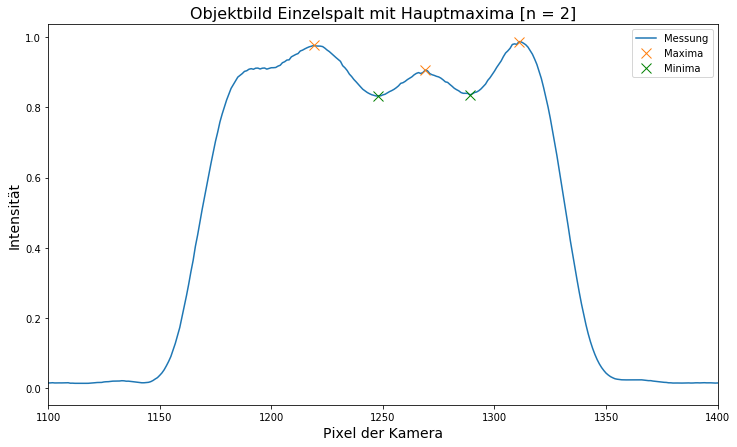

In [25]:
# Bild bei zwei Maxima
file2 = open('data/233/3n2.csv', 'r')

a2 = np.empty(2, float)

for line in file2:

    line = line.strip('\n')
    line = line.split(',')
    
    foo = float(line[0])
    bar = float(line[1])
    
    a2 = np.vstack([a2, [foo, bar]])

pixel2 = a2[:, 0]
intensity2 = a2[:, 1]

intensity2 = intensity2 / I_0_max


maxima_exp2, _ = find_peaks(intensity2, height = 0.6, distance = 30)
minima_exp2, _ = find_peaks(intensity2, height = (0.8, 0.88))

plt.figure(figsize = (12, 7))
plt.plot(pixel2[1:], intensity2[1:], label = 'Messung')
plt.title('Objektbild Einzelspalt mit Hauptmaxima [n = 2]', size = 16)
plt.xlabel('Pixel der Kamera', size = 14)
plt.ylabel('Intensität', size = 14)
plt.plot(maxima_exp2, intensity2[maxima_exp2], 'x', markersize = 10, label = 'Maxima')
plt.plot(minima_exp2, intensity2[minima_exp2], 'x', markersize = 10, label = 'Minima', 
         color = 'green')
plt.plot(1289, intensity2[1289], 'x', markersize = 10, color = 'green')
plt.xlim(1100, 1400)
plt.legend()

plt.savefig('images/233/V233DiagrammIex2.png')

# Abstand zwischen Maxima
dist, sig_dist = abstand(maxima_exp2)
# Intensität der Maxima, aufsteigend von links nach rechts
I_2_ex_max = intensitaet(intensity2, maxima_exp2)
    
I_2_ex_min = intensitaet_min(intensity2, np.append(minima_exp2, 1289))

I_2_ex_gr = np.array([I_2_ex_max[0], I_2_ex_min[0], I_2_ex_max[1], 
                      I_2_ex_min[1], I_2_ex_max[2]])

Abstand zwischen Maxima:
[20. 13. 11.  8.  8.  8.  9.  8.  7.  8.  8. 12. 17.]

Mittlerer Abstand
10.538 +/- 1.03 [px]

Abstand zwischen Minima:
[15. 13.  9.  8.  9.  8.  8.  7.  8.  8.  9. 14.]

Mittlerer Abstand
9.667 +/- 0.719 [px]

Intensität der 1. Maxima: 1.1044
Intensität der 2. Maxima: 1.0481
Intensität der 3. Maxima: 1.0125
Intensität der 4. Maxima: 0.9869
Intensität der 5. Maxima: 0.9528
Intensität der 6. Maxima: 0.9138
Intensität der 7. Maxima: 0.8875
Intensität der 8. Maxima: 0.8699
Intensität der 9. Maxima: 0.8798
Intensität der 10. Maxima: 0.9143
Intensität der 11. Maxima: 0.948
Intensität der 12. Maxima: 0.9758
Intensität der 13. Maxima: 0.9619
Intensität der 14. Maxima: 1.1031


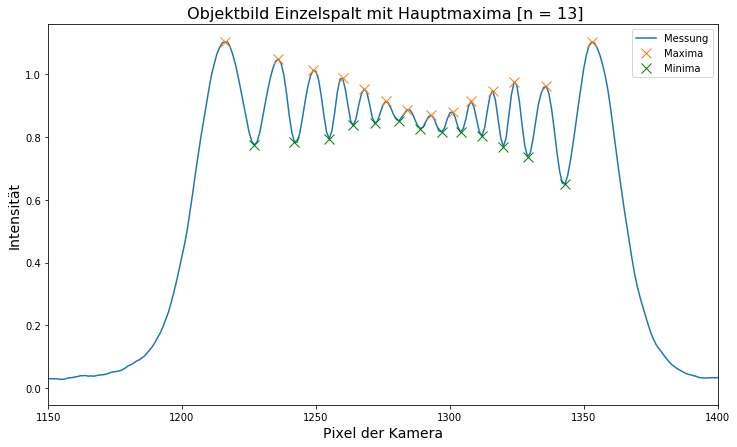

In [26]:
# Bild bei 13 Maxima
file13 = open('data/233/3n15.csv', 'r')

a13 = np.empty(2, float)

for line in file13:

    line = line.strip('\n')
    line = line.split(',')
    
    foo = float(line[0])
    bar = float(line[1])
    
    a13 = np.vstack([a13, [foo, bar]])

pixel13 = a13[:, 0]
intensity13 = a13[:, 1]

intensity13 = intensity13 / I_0_max

maxima_exp13, _ = find_peaks(intensity13, height = 0.6, distance = 7)
minima_exp13 = argrelextrema(intensity13, np.less)
minima_exp13 = np.array(minima_exp13)[0]

a = 374
b = 386

plt.figure(figsize = (12, 7))
plt.plot(pixel13[1:], intensity13[1:], label = 'Messung')
plt.title(' Objektbild Einzelspalt mit Hauptmaxima [n = 13]', size = 16)
plt.xlabel('Pixel der Kamera', size = 14)
plt.ylabel('Intensität', size = 14)
plt.plot(maxima_exp13, intensity13[maxima_exp13], 'x', markersize = 10, label = 'Maxima')
plt.plot(minima_exp13[a:b], intensity13[minima_exp13[a:b]], 'x', markersize = 10, 
         color = 'green')
plt.plot(minima_exp13[373], intensity13[minima_exp13[373]], 'x', markersize = 10, 
         color = 'green', label = 'Minima')
plt.xlim(1150, 1400)
plt.legend()

plt.savefig('images/233/V233DiagrammIex13.png')


# Abstand zwischen Maxima
dist_max13, sig_dist_max13 = abstand(maxima_exp13)
print('')
dist_min13, sig_dist_min13 = abstand_min(np.append(minima_exp13[373], minima_exp13[a:b]))
# Intensität der Maxima, aufsteigend von links nach rechts
I_13_ex = intensitaet(intensity13, maxima_exp13)

In [27]:
# Intensitäte der Maxima und Minima n.-ter Ordnung, wie abgelesen im Messprotokoll
IF_0 = 0.726
IF_1 = np.array([0.704, 0.606, 0.692])
IF_2 = np.array([0.710, 0.609, 0.653, 0.610, 0.717])
IF_3 = np.array([0.688, 0.440, 0.672, 0.632, 0.654, 0.570, 0.737])

# Fehler und Untergrund wie bei letzten Messungen: sig_I, Ug, sig_Ug, sig_I_u
#IF_u angepasst auf Ug
IF_0_u = IF_0 - Ug
IF_1_u = IF_1 - Ug
IF_2_u = IF_2 - Ug
IF_3_u = IF_3 - Ug

# Verhältnis zu IF_0
IF_10 = IF_1_u / IF_0_u
IF_20 = IF_2_u / IF_0_u
IF_30 = IF_3_u / IF_0_u

sig_IF_10 = IF_10 * sqrt((sig_I_u / IF_1_u) ** 2 + (sig_I_u / IF_0_u) ** 2)
sig_IF_20 = IF_20 * sqrt((sig_I_u / IF_2_u) ** 2 + (sig_I_u / IF_0_u) ** 2)
sig_IF_30 = IF_30 * sqrt((sig_I_u / IF_3_u) ** 2 + (sig_I_u / IF_0_u) ** 2)


print('Verhältnis zu IF_0:')
print('IF_10 =', np.round(IF_10, 3))
print('    +/-', np.round(sig_IF_10, 3))
print('\nIF_20 =', np.round(IF_20, 3))
print('    +/-', np.round(sig_IF_20, 3))
print('\nIF_30 =', np.round(IF_30, 3))
print('    +/-', np.round(sig_IF_30, 3))

Verhältnis zu IF_0:
IF_10 = [0.969 0.833 0.953]
    +/- [0.019 0.018 0.019]

IF_20 = [0.978 0.838 0.899 0.839 0.987]
    +/- [0.02  0.018 0.019 0.018 0.02 ]

IF_30 = [0.947 0.603 0.925 0.869 0.9   0.783 1.015]
    +/- [0.019 0.016 0.019 0.018 0.019 0.018 0.02 ]


Intensitätsverhältnisse: Theoretisch
---

In [28]:
# Spaltfunktion
def spalt(k,y):
    return d1 / pi * np.sin(k * d1 / 2) / (k * d1 / 2) * np.cos(y * k)


d1 = 1 # Spaltbreite
#n = 1 # Integrationsbereich
p = 1.38976 # maximale Intensität bei 0. Beugungsordnung 
Y = np.linspace(-1,1, 400) * d1

# f modifiziert
def f_mod(Y, n):
    f_modifiziert = []
    for i in range(len(Y)):
        y = Y[i]
        result, error = quad(spalt, 0, 2 * pi * n / d1, args = (y,)) 
        f_modifiziert.append((result ** 2) / p)
    return f_modifiziert


Intensität der 1. Maxima: 1.0001


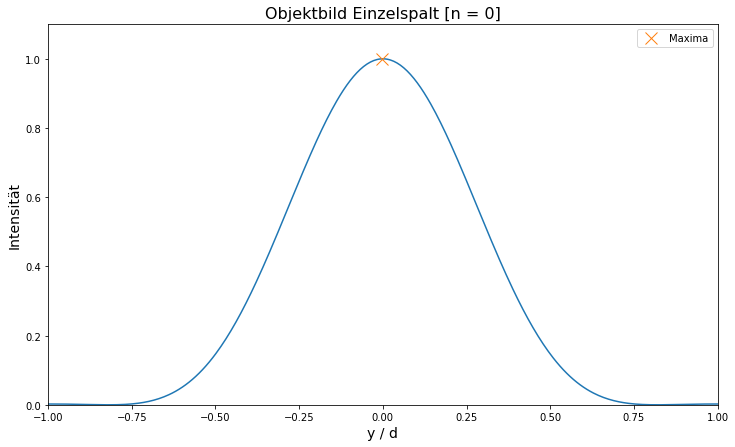

In [29]:
# Plot 0. Ordnung
maxima_theo0, _ = find_peaks(f_mod(Y, 1), height = 0.5)



plt.figure(figsize = (12, 7))
plt.plot(Y, f_mod(Y, 1))
plt.plot(Y[maxima_theo0], f_mod(Y[maxima_theo0], 1), 'x', markersize = 12, label = 'Maxima')
plt.xlabel('y / d', size = 14)
plt.ylabel('Intensität', size = 14)
plt.title('Objektbild Einzelspalt [n = 0]', size = 16) 
plt.xlim((-1, 1))
plt.ylim((0,1.1))
plt.legend(loc = 'best')

plt.savefig('images/233/V233DiagrammItheo0.png')


# Intensität der Maxima, aufsteigend von links nach rechts
I_0_theo = intensitaet(f_mod(Y, 1), maxima_theo0)

Abstand zwischen Maxima:
[0.4962406]

Mittlerer Abstand
0.496 +/- 0.0 [px]

Intensität der 1. Maxima: 0.9067
Intensität der 2. Maxima: 0.9067

Intensität der 1. Minima: 0.5866


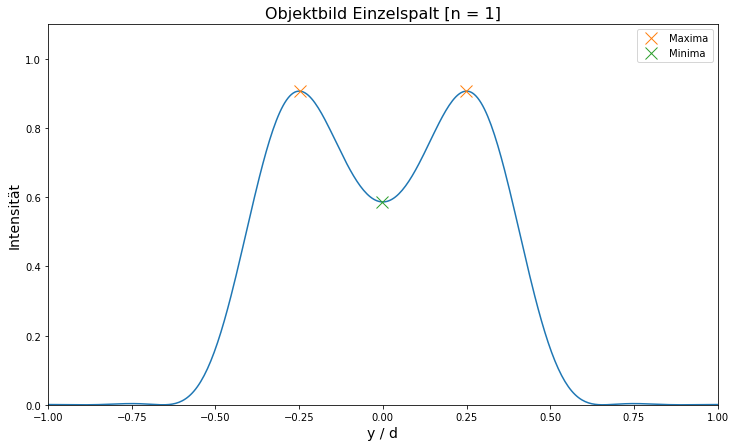

In [30]:
# Plot 1. Ordnung
maxima_theo1, _ = find_peaks(f_mod(Y, 2), height = 0.5)
minima_theo1 = np.array([199])


plt.figure(figsize = (12, 7))
plt.plot(Y, f_mod(Y, 2))
plt.xlabel('y / d', size = 14)
plt.plot(Y[maxima_theo1], f_mod(Y[maxima_theo1], 2), 'x', markersize = 12, label = 'Maxima')
plt.plot(Y[minima_theo1], f_mod(Y[minima_theo1], 2), 'x', markersize = 12, label = 'Minima')
plt.ylabel('Intensität', size = 14)
plt.title('Objektbild Einzelspalt [n = 1]',size = 16) 
plt.xlim((-1, 1))
plt.ylim((0, 1.1))
plt.legend(loc = 'best')

plt.savefig('images/233/V233DiagrammItheo1.png')

# Abstand zwischen Maxima
dist, sig_dist = abstand(Y[maxima_theo1])
# Intensität der Maxima, aufsteigend von links nach rechts
I_1_theo_max = intensitaet(f_mod(Y, 2), maxima_theo1)

I_1_theo_min = intensitaet_min(f_mod(Y, 2), np.array([199]))

I_1_theo = np.array([I_1_theo_max[0], I_1_theo_min[0], I_1_theo_max[1]])

Abstand zwischen Maxima:
[0.33082707 0.3358396 ]

Mittlerer Abstand
0.333 +/- 0.001 [px]

Intensität der 1. Maxima: 0.8859
Intensität der 2. Maxima: 0.8178
Intensität der 3. Maxima: 0.8859

Intensität der 1. Minima: 0.6175
Intensität der 2. Minima: 0.6178


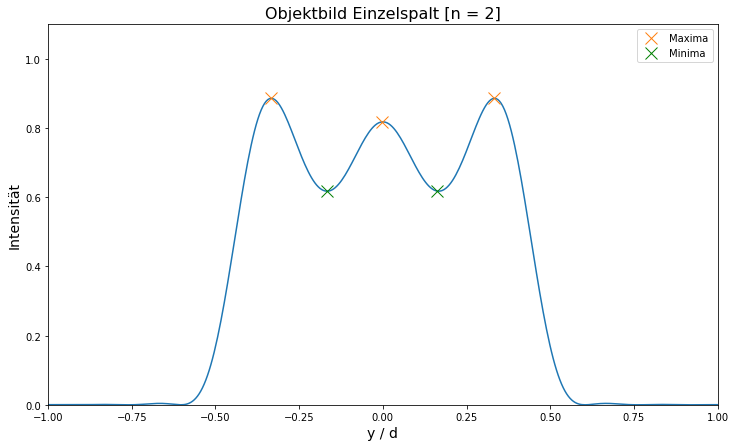

In [31]:
# Plot 2. Ordnung
maxima_theo2, _ = find_peaks(f_mod(Y, 3), height = 0.5)
#min_ind_2, _ = find_peaks(f_mod(Y[argrelmin(np.array(f_mod(Y, 3)))], 3), 
 #                         height = 0.4)
min_ind_2, _ = find_peaks(f_mod(Y[argrelmin(np.array(f_mod(Y, 3)))], 3),
                         height = 0.4)
minima_theo2 = np.array([argrelmin(np.array(f_mod(Y, 3)))[0][min_ind_2]][0])

plt.figure(figsize = (12, 7))
plt.plot(Y, f_mod(Y, 3))
plt.xlabel('y / d', size = 14)
plt.plot(Y[maxima_theo2], f_mod(Y[maxima_theo2], 3), 'x', markersize = 12, 
         label = 'Maxima')
plt.plot(Y[minima_theo2], f_mod(Y[minima_theo2], 3), 'x', markersize = 12, 
         label = 'Minima', color = 'green')
plt.plot(Y[np.array([232])], f_mod(Y[np.array([232])], 3),'x', markersize = 12,
        color = 'green')
plt.ylabel('Intensität', size = 14)
plt.title('Objektbild Einzelspalt [n = 2]',size = 16) 
plt.xlim((-1, 1))
plt.ylim((0, 1.1))
plt.legend(loc = 'best')

plt.savefig('images/233/V233DiagrammItheo2.png')

# Abstand zwischen Maxima
dist, sig_dist = abstand(Y[maxima_theo2])
# Intensität der Maxima, aufsteigend von links nach rechts
I_2_max_theo = intensitaet(f_mod(Y, 3), maxima_theo2)

I_2_min_theo = intensitaet_min(f_mod(Y, 3), np.append(minima_theo2, np.array([232])))

I_2_theo = np.array([I_2_max_theo[0], I_2_min_theo[0], I_2_max_theo[1], 
                     I_2_min_theo[0], I_2_max_theo[2]])

Abstand zwischen Maxima:
[0.25062657 0.24561404 0.25062657]

Mittlerer Abstand
0.249 +/- 0.001 [px]

Intensität der 1. Maxima: 0.8767
Intensität der 2. Maxima: 0.798
Intensität der 3. Maxima: 0.798
Intensität der 4. Maxima: 0.8767

Intensität der 1. Minima: 0.6286
Intensität der 2. Minima: 0.6494
Intensität der 3. Minima: 0.6288


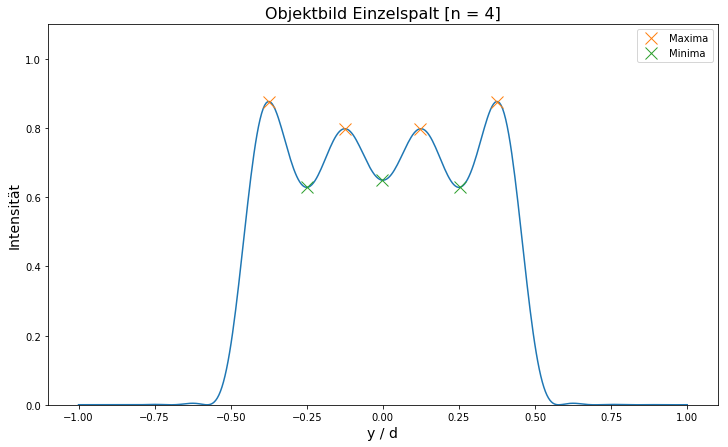

In [32]:
# Plot 3. Ordnung
maxima_theo3, _ = find_peaks(f_mod(Y, 4), height = 0.5)
min_ind_3, _ = find_peaks(f_mod(Y[argrelmin(np.array(f_mod(Y, 4)))], 4),
                         height = 0.4)
minima_theo3 = np.append(np.array([argrelmin(np.array(f_mod(Y, 4)))[0][min_ind_3]]), 
                         np.array([199, 250]))


plt.figure(figsize = (12, 7))
plt.plot(Y, f_mod(Y, 4))
plt.xlabel('y / d', size = 14)
plt.plot(Y[maxima_theo3], f_mod(Y[maxima_theo3], 4), 'x', markersize = 12, 
         label = 'Maxima')
plt.plot(Y[minima_theo3], f_mod(Y[minima_theo3], 4), 'x', markersize = 12, 
         label = 'Minima')
plt.ylabel('Intensität', size = 14)
plt.title('Objektbild Einzelspalt [n = 4]',size = 16) 
plt.ylim((0,1.1))
plt.legend(loc = 'best')

plt.savefig('images/233/V233DiagrammItheo3.png')

# Abstand zwischen Maxima
dist, sig_dist = abstand(Y[maxima_theo3])
# Intensität der Maxima, aufsteigend von links nach rechts
I_3_max_theo = intensitaet(f_mod(Y, 4), maxima_theo3)

I_3_min_theo = intensitaet_min(f_mod(Y, 4), minima_theo3)

I_3_theo = np.array([I_3_max_theo[0], I_3_min_theo[0], I_3_max_theo[1], 
                     I_3_min_theo[1], I_3_max_theo[2], I_3_min_theo[2],
                    I_3_max_theo[3]])

Abstand zwischen Maxima:
[0.07017544 0.07017544 0.07518797 0.07017544 0.07017544 0.07017544
 0.07518797 0.07017544 0.07017544 0.07017544 0.07518797 0.07017544
 0.07017544]

Mittlerer Abstand
0.071 +/- 0.001 [px]

Richtiger Abstand Maxima: good_dist = 10.56 +/- 0.44 [px]

Abstand zwischen Minima:
[0.07017544 0.07518797 0.07017544 0.07017544 0.07017544 0.07518797
 0.07017544 0.07017544 0.07017544 0.07017544 0.07518797 0.07017544]

Mittlerer Abstand
0.071 +/- 0.001 [px]

Richtiger Abstand Minima: good_dist_min = 10.56 +/- 0.44 [px]

Intensität der 1. Maxima: 0.8597
Intensität der 2. Maxima: 0.7739
Intensität der 3. Maxima: 0.7548
Intensität der 4. Maxima: 0.7471
Intensität der 5. Maxima: 0.7435
Intensität der 6. Maxima: 0.7415
Intensität der 7. Maxima: 0.7403
Intensität der 8. Maxima: 0.7403
Intensität der 9. Maxima: 0.7415
Intensität der 10. Maxima: 0.7435
Intensität der 11. Maxima: 0.7471
Intensität der 12. Maxima: 0.7548
Intensität der 13. Maxima: 0.7739
Intensität der 14. Maxima: 0.85

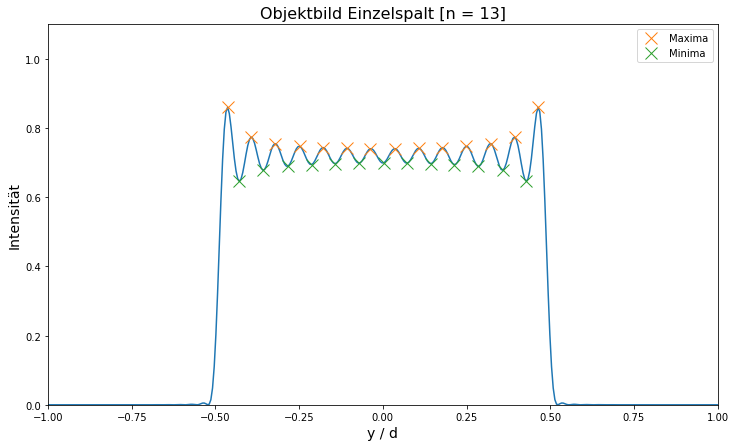

In [33]:
# Plot n = 13
maxima_theo13, _ = find_peaks(f_mod(Y, 14), height = 0.5)
minima_theo13 = np.sort(np.append(argrelmin(np.array(f_mod(Y, 14)))[0][14:26], 200))

plt.figure(figsize = (12, 7))
plt.plot(Y, f_mod(Y, 14))
plt.xlabel('y / d', size = 14)
plt.plot(Y[maxima_theo13], f_mod(Y[maxima_theo13], 14), 'x', markersize = 12, 
         label = 'Maxima')
plt.plot(Y[minima_theo13], f_mod(Y[minima_theo13], 14), 'x', markersize = 12, 
         label = 'Minima')
plt.ylabel('Intensität', size = 14)
plt.title('Objektbild Einzelspalt [n = 13]',size = 16) 
plt.xlim((-1, 1))
plt.ylim((0,1.1))
plt.legend(loc = 'best')

plt.savefig('images/233/V233DiagrammItheo13.png')

norm_2_px = 148
sig_norm_2_px = 6



# Abstand zwischen Maxima
dist, sig_dist = abstand(Y[maxima_theo13])
good_dist = dist * norm_2_px
sig_good_dist = good_dist * sqrt( (sig_norm_2_px / norm_2_px) ** 2 
                                 + (sig_dist / dist) ** 2 )

print('')
ergebnis('Richtiger Abstand Maxima: good_dist', good_dist, sig_good_dist, 2, 
         '[px]\n')

# Abstand zwischen Minima
dist_min, sig_dist_min = abstand_min(Y[minima_theo13])
good_dist_min = dist * norm_2_px
sig_good_dist_min = good_dist_min * sqrt( (sig_norm_2_px / norm_2_px) ** 2 + (sig_dist_min / dist_min) ** 2 )

print('')
ergebnis('Richtiger Abstand Minima: good_dist_min', good_dist_min, 
         sig_good_dist_min, 2, '[px]')

# Intensität der Maxima, aufsteigend von links nach rechts
I_13_theo = intensitaet(f_mod(Y, 14), maxima_theo13)

Vergleich der Intensitätsbilder:
--

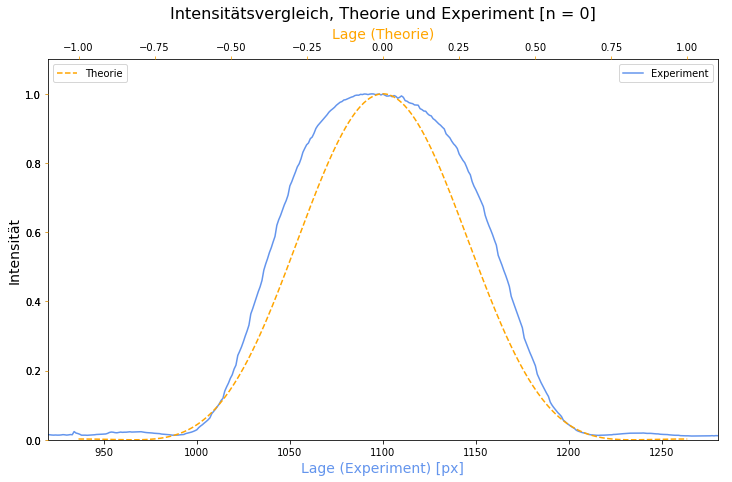

In [34]:
# Bild bei n = 0
x_values1 = pixel0
y_values1 = intensity0

x_values2 = Y
y_values2 = f_mod(Y, 1)

fig = plt.figure(figsize = (12, 7))
plt.title('Intensitätsvergleich, Theorie und Experiment [n = 0]\n\n', size = 16)
plt.axis('off')

ax = fig.add_subplot(111, label = "1")
ax2 = fig.add_subplot(111, label = "2", frame_on = False)


ax.plot(x_values1, y_values1, label = 'Experiment', color = 'cornflowerblue')
ax.set_xlabel('Lage (Experiment) [px]', size = 14, color = 'cornflowerblue')
ax.set_ylabel('Intensität', size = 14)
ax.set_ylim([0, 1.1])
ax.set_xlim([920, 1280])
ax.xaxis.tick_bottom()
#ax.tick_params(axis = 'x', color = 'cornflowerblue')
ax.tick_params(axis = 'y', color = 'cornflowerblue')
ax.legend()

ax2.plot(x_values2, y_values2, color = 'orange', label = 'Theorie', linestyle = '--')
ax2.set_ylim([0, 1])
ax2.xaxis.tick_top()
#ax2.yaxis.tick_right()
ax2.set_xlabel('Lage (Theorie)', color = 'orange', size = 14)      
ax2.xaxis.set_label_position('top') 
ax2.tick_params(axis = 'x', color = 'orange')
ax2.tick_params(axis = 'y', color = 'orange')
ax2.set_ylim((0, 1.1))
ax2.legend(loc = 'upper left')

plt.savefig('images/233/V233DiagrammIv0.png')

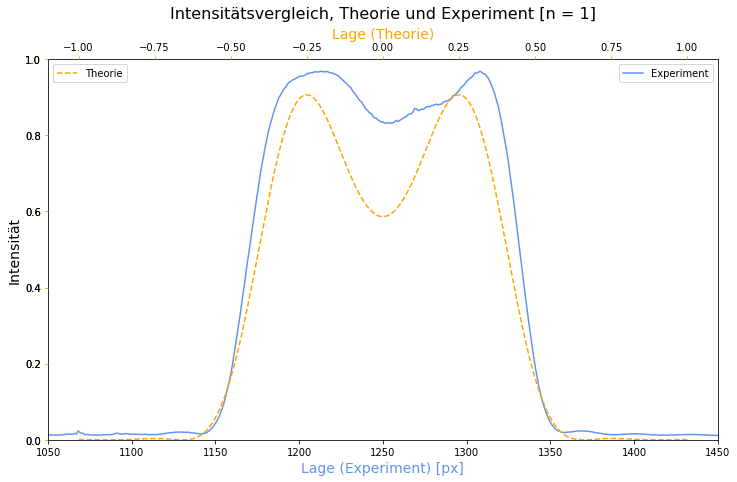

In [35]:
# Bild bei n = 1
x_values1 = pixel1
y_values1 = intensity1

x_values2 = Y
y_values2 = f_mod(Y, 2)

fig = plt.figure(figsize = (12, 7))
plt.title('Intensitätsvergleich, Theorie und Experiment [n = 1]\n\n', size = 16)
plt.axis('off')

ax = fig.add_subplot(111, label = "1")
ax2 = fig.add_subplot(111, label = "2", frame_on = False)


ax.plot(x_values1, y_values1, label = 'Experiment', color = 'cornflowerblue')
ax.set_xlabel('Lage (Experiment) [px]', size = 14, color = 'cornflowerblue')
ax.set_ylabel('Intensität', size = 14)
ax.set_ylim([0, 1])
ax.set_xlim([1050, 1450])
ax.xaxis.tick_bottom()
#ax.tick_params(axis = 'x', color = 'cornflowerblue')
ax.tick_params(axis = 'y', color = 'cornflowerblue')
ax.legend()

ax2.plot(x_values2, y_values2, color = 'orange', label = 'Theorie', linestyle = '--')
ax2.set_ylim([0, 1])
ax2.xaxis.tick_top()
#ax2.yaxis.tick_right()
ax2.set_xlabel('Lage (Theorie)', color = 'orange', size = 14)      
ax2.xaxis.set_label_position('top') 
ax2.tick_params(axis = 'x', color = 'orange')
ax2.tick_params(axis = 'y', color = 'orange')
ax2.legend(loc = 'upper left')

plt.savefig('images/233/V233DiagrammIv1.png')

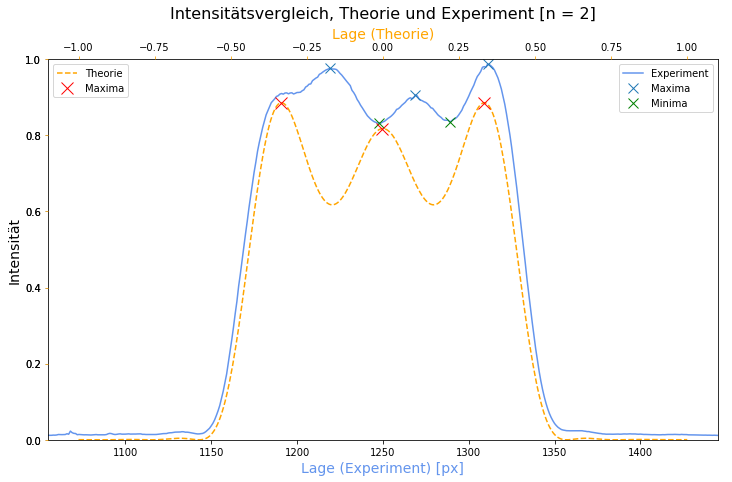

In [36]:
# Bild bei n = 2
maxima2, _ = find_peaks(f_mod(Y, 3), height = 0.5)

x_values1 = pixel2
y_values1 = intensity2

x_values2 = Y
y_values2 = f_mod(Y, 3)

fig = plt.figure(figsize = (12, 7))
plt.title('Intensitätsvergleich, Theorie und Experiment [n = 2]\n\n', size = 16)
plt.axis('off')

ax = fig.add_subplot(111, label = "1")
ax2 = fig.add_subplot(111, label = "2", frame_on = False)


ax.plot(x_values1, y_values1, label = 'Experiment', color = 'cornflowerblue')
ax.plot(maxima_exp2, intensity2[maxima_exp2], 'x', markersize = 10, 
        label = 'Maxima')
ax.plot(minima_exp2, intensity2[minima_exp2], 'x', markersize = 10, 
        label = 'Minima', color = 'green')
ax.plot(1289, intensity2[1289], 'x', markersize = 10, 
        color = 'green') # Python braucht ein bisschen Hilfe
ax.set_xlabel('Lage (Experiment) [px]', size = 14, color = 'cornflowerblue')
ax.set_ylabel('Intensität', 
              size = 14)
ax.set_ylim([0, 1])
ax.set_xlim([1055, 1445])
ax.xaxis.tick_bottom()
#ax.tick_params(axis = 'x', color = 'cornflowerblue')
ax.tick_params(axis = 'y', color = 'cornflowerblue')
ax.legend()

ax2.plot(x_values2, y_values2, color = 'orange', label = 'Theorie', 
         linestyle = '--')
ax2.plot(Y[maxima2], f_mod(Y[maxima2], 3), 'x', markersize = 12, 
         label = 'Maxima', color = 'red')
ax2.set_ylim([0, 1])
ax2.xaxis.tick_top()
#ax2.yaxis.tick_right()
ax2.set_xlabel('Lage (Theorie)', color = 'orange', size = 14)
ax2.xaxis.set_label_position('top') 
ax2.tick_params(axis = 'x', color = 'orange')
ax2.tick_params(axis = 'y', color = 'orange')
ax2.legend(loc = 'upper left')

plt.savefig('images/233/V233DiagrammIv2.png')

Abstand der Maxima (exp):  137
Abstand der Maxima (theo):  0.9273182957393483
norm_2_px = 148.0 +/- 6.0 [px]


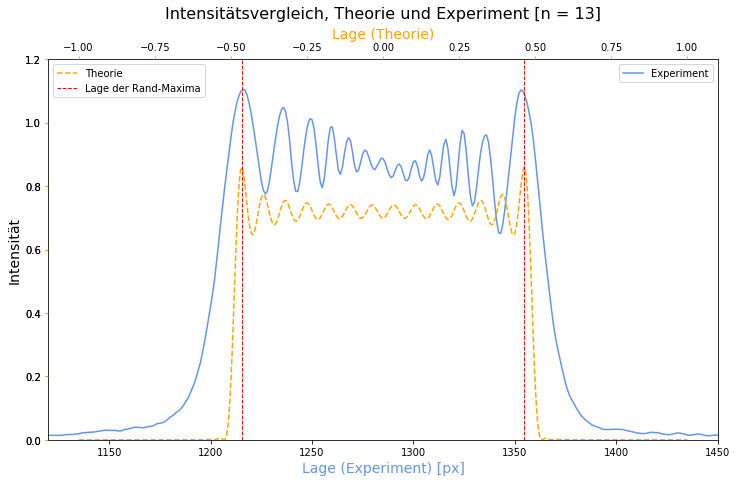

In [37]:

# Bild bei 13 Maxima
x_values1 = pixel13
y_values1 = intensity13

x_values2 = Y
y_values2 = f_mod(Y, 14)

fig = plt.figure(figsize = (12, 7))
plt.title('Intensitätsvergleich, Theorie und Experiment [n = 13]\n\n', size = 16)
plt.axis('off')

ax = fig.add_subplot(111, label = "1")
ax2 = fig.add_subplot(111, label = "2", frame_on = False)

ax.plot(x_values1, y_values1, label = 'Experiment', color = 'cornflowerblue')
ax.axvline()
ax.set_xlabel('Lage (Experiment) [px]', size = 14, color = 'cornflowerblue')
ax.set_ylabel('Intensität', size = 14)
ax.set_ylim([0, 1.2])
ax.set_xlim([1120, 1450])
ax.xaxis.tick_bottom()
#ax.tick_params(axis = 'x', color = 'cornflowerblue')
ax.tick_params(axis = 'y', color = 'cornflowerblue')
ax.legend()

ax2.plot(x_values2, y_values2, color = 'orange', label = 'Theorie', 
         linestyle = '--')
ax2.axvline(Y[maxima_theo13[0]], color = 'red', linestyle = '--', 
            label = 'Lage der Rand-Maxima', linewidth = 1)
ax2.axvline(Y[maxima_theo13[13]], color = 'red', linestyle = '--', 
            linewidth = 1)
ax2.set_ylim([0, 1.2])
ax2.xaxis.tick_top()
#ax2.yaxis.tick_right()
ax2.set_xlabel('Lage (Theorie)', color = 'orange', size = 14)      
ax2.xaxis.set_label_position('top') 
ax2.tick_params(axis = 'x', color = 'orange')
ax2.tick_params(axis = 'y', color = 'orange')
ax2.legend(loc = 'upper left')

plt.savefig('images/233/V233DiagrammIv13.png')

Delta_ex = np.abs(maxima_exp13[0] - maxima_exp13[-1])
sig_Delta_ex = 5
Delta_theo = np.abs(Y[maxima_theo13[0]] - Y[maxima_theo13[-1]])
sig_Delta_theo = 0.01

norm_2_px = Delta_ex / Delta_theo
sig_norm_2_px = norm_2_px * sqrt( (sig_Delta_ex / Delta_ex) ** 2 
                                 + (sig_Delta_theo / Delta_theo) ** 2 )

print('Abstand der Maxima (exp): ', Delta_ex)
print('Abstand der Maxima (theo): ', Delta_theo)
ergebnis('norm_2_px', norm_2_px, sig_norm_2_px, 0, '[px]')

VIII.4 Fourierbild des Doppelspaltes
---

Spaltbreite und Spaltmittelabstand
--

In [38]:
# Spaltbreite
B = 136 # px
sig_B = 10
b = 0.845 # m
sig_b = 0.001
f = 0.08 # 

G = B / (b / f - 1) 
sig_G = sqrt((sig_B / (b / f -1)) ** 2 
             + (((B / f) * sig_b) / ((b / f - 1) ** 2)) ** 2) 
scale = 14
G_m2 = scale * G 
sig_G_m2 = scale * sig_G 


ergebnis('Spaltbreite: G', G_m2, sig_G_m2, 0, '[10^-6 m]')

Spaltbreite: G = 199.0 +/- 15.0 [10^-6 m]


In [47]:
# Berechnung für den Spaltmittenabstand
B = 409
sig_B = 10

G_m3 = B / (b / f - 1) 
sig_G_m3 = sqrt((sig_B / (b / f -1)) ** 2 
             + (((B / f) * sig_b) / ((b / f - 1) ** 2)) ** 2) 

G_mm_m3 = scale * G_m3
sig_G_mm_m3 = scale * sig_G_m3


ergebnis('Spaltmittelabstand: G_mittel', G_mm_m3, sig_G_mm_m3, 0, '[10^-6 m]')

Spaltmittelabstand: G_mittel = 599.0 +/- 15.0 [10^-6 m]


In [40]:
def doppelspalt(k, y):
    return d / pi * np.cos(k * g / 2) * np.sin(k * d/ 2) / (k * d / 2) * np.cos(y * k)

d = 0.199 # Spaltbreite
g = 2.177 * d
n = 1
Y = np.linspace(-1,1,400) 

# f modifiziert
def f_mod_d(Y, n):
    f_modifiziert = []
    for i in range(len(Y)):
        y = Y[i]
        result, error = quad(doppelspalt, 0, 2 * pi * n / d, args = (y,)) 
        f_modifiziert.append((result ** 2))
    return f_modifiziert / np.max(f_modifiziert)


Intensität der 1. Maxima: 1.0
Intensität der 2. Maxima: 1.0


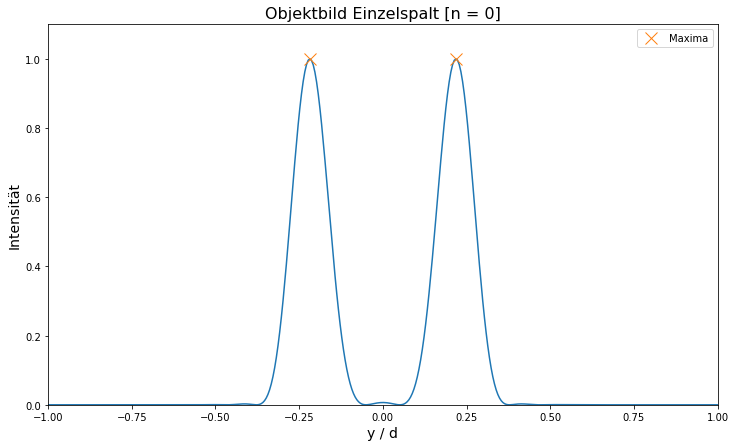

In [41]:
# Plot 0. Ordnung
maxima_dop0, _ = find_peaks(f_mod_d(Y, 1), height = 0.5)

plt.figure(figsize = (12, 7))
plt.plot(Y, f_mod_d(Y, 1))
plt.plot(Y[maxima_dop0], f_mod_d(Y[maxima_dop0], 1), 'x', markersize = 12, 
         label = 'Maxima')
plt.xlabel('y / d', size = 14)
plt.ylabel('Intensität', size = 14)
plt.title('Objektbild Einzelspalt [n = 0]',size = 16) 
plt.xlim((-1, 1))
plt.ylim((0,1.1))
plt.legend(loc = 'best')

plt.savefig('images/233/V233DiagrammIDop0.png')


# Intensität der Maxima, aufsteigend von links nach rechts
ID_0_theo = intensitaet(f_mod_d(Y, 1), maxima_dop0)

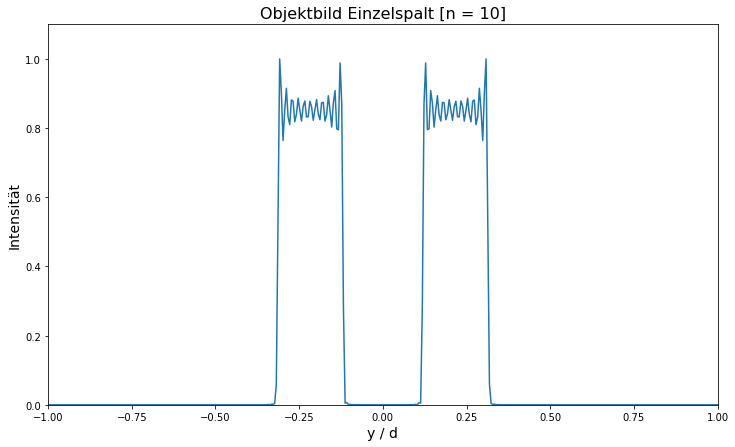

In [42]:
# Plot 13. Ordnung
#maxima_dop13, _ = find_peaks(f_mod_d(Y, 10), height = 0.5)

plt.figure(figsize = (12, 7))
plt.plot(Y, f_mod_d(Y, 11))
#plt.plot(Y[maxima_dop13], f_mod_d(Y[maxima_dop13], 10), 'x', markersize = 12, 
 #        label = 'Maxima')
plt.xlabel('y / d', size = 14)
plt.ylabel('Intensität', size = 14)
plt.title('Objektbild Einzelspalt [n = 10]',size = 16) 
plt.xlim((-1, 1))
plt.ylim((0,1.1))
#plt.legend(loc = 'best')

plt.savefig('images/233/V233DiagrammIDop13.png')


# Intensität der Maxima, aufsteigend von links nach rechts
#ID_0_theo = intensitaet(f_mod_d(Y, 10), maxima_dop13)

Maxima der Plateaukurve

Intensität der 1. Maxima: 1.0
Maxima der Fehlerkurve

Intensität der 1. Maxima: 1.0
Intensität der 2. Maxima: 1.0


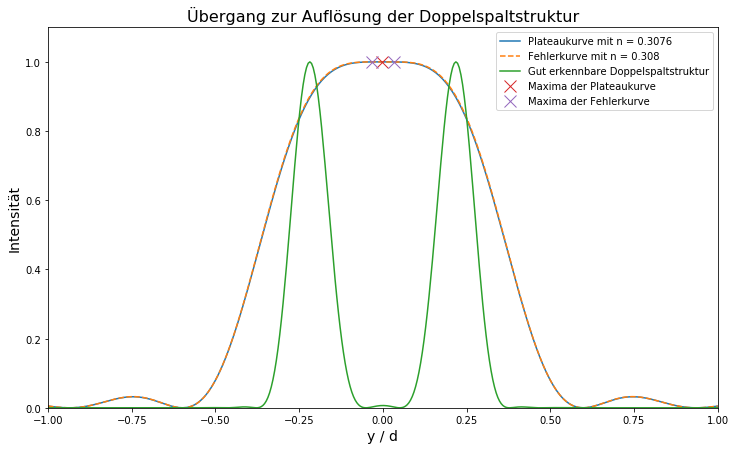

In [43]:
# Plot 1. Ordnung
n = 0.3076
m = 0.308
sig_n = 0.0005

# Suche Übergang von 2 auf 1 Maxima
maxima_dop1, _ = find_peaks(f_mod_d(Y, n), height = 0.5)
maxima_dop1_m, _ = find_peaks(f_mod_d(Y, m), height = 0.5)

plt.figure(figsize = (12, 7))
plt.plot(Y, f_mod_d(Y, n), label = 'Plateaukurve mit n = ' + str(n))
plt.plot(Y, f_mod_d(Y, m), label = 'Fehlerkurve mit n = ' + str(m), linestyle = '--')
plt.plot(Y, f_mod_d(Y, 1), label = 'Gut erkennbare Doppelspaltstruktur')
plt.plot(Y[maxima_dop1], f_mod_d(Y[maxima_dop1], n), 'x', markersize = 12, 
         label = 'Maxima der Plateaukurve')
plt.plot(Y[maxima_dop1_m], f_mod_d(Y[maxima_dop1_m], m), 'x', markersize = 12, label = 'Maxima der Fehlerkurve')
plt.xlabel('y / d', size = 14)
plt.ylabel('Intensität', size = 14)
plt.title('Übergang zur Auflösung der Doppelspaltstruktur', size = 16) 
plt.xlim((-1, 1))
plt.ylim((0,1.1))
plt.legend(loc = 'best')

plt.savefig('images/233/V233DiagrammIDopAuf.png')


# Intensität der Maxima, aufsteigend von links nach rechts
print('Maxima der Plateaukurve')
ID_n_theo = intensitaet(f_mod_d(Y, n), maxima_dop1)
print('Maxima der Fehlerkurve')
ID_m_theo = intensitaet(f_mod_d(Y, m), maxima_dop1_m)

In [48]:
# Berechnung k: Theoretisch

k_yb_theo = 2 * n * pi / (G_m2 * 1e-3)
k_ya_theo = 2 * pi / (G_m2 * 1e-3) 
sig_k_yb_theo = k_yb_theo * sqrt((sig_n / n) ** 2 + (sig_G_m2 / G_m2) ** 2) 
sig_k_ya_theo = k_ya_theo * sqrt((0 / n) ** 2 + (sig_G_m2 / G_m2) ** 2) 

ergebnis('Theoretisches k_ya_theo', k_ya_theo, sig_k_ya_theo, 1, '[10^-3 m^-1]')
ergebnis('Theoretisches k_yb_theo', k_yb_theo, sig_k_yb_theo, 1, '[10^-3 m^-1]')

Theoretisches k_ya_theo = 31.6 +/- 2.3 [10^-3 m^-1]
Theoretisches k_yb_theo = 9.7 +/- 0.7 [10^-3 m^-1]


In [49]:
# Berechnung k: Experimentell

d_a = 0.27 # mm
sig_d_a = 0.01 
d_b = 0.07
sig_d_b = 0.01
f = 0.08 # m

k_ya_exp = (2 * pi * d_a)/(lambda_k * f) * 1e-6 # m^-1
sig_k_ya_exp = k_ya_exp * sig_d_a / d 
k_yb_exp = (2 * pi * d_b) / (lambda_k * f) * 1e-6 
sig_k_yb_exp = k_yb_exp * sig_d_b / d 


ergebnis('Experimentelles k_ya_exp', k_ya_exp, sig_k_ya_exp, 1, '[10^-3 m^-1]')
ergebnis('Experimentelles k_yb_exp', k_yb_exp, sig_k_yb_exp, 1, '[10^-3 m^-1]')

Experimentelles k_ya_exp = 33.4 +/- 1.7 [10^-3 m^-1]
Experimentelles k_yb_exp = 8.7 +/- 0.4 [10^-3 m^-1]


Sigmas
--

VIII.1

In [50]:
# Mittlerer Abstand und Steigung der Gerade
fehler('Delta Minima:', np.abs(Delta_min_mean), sig_Delta_min_mean, np.abs(m_2), sig_m_2)

Delta Minima:
Relativer Fehler:  1.038565648770192
Rel. Fehler (Vergleich): 0.4152166755667483
Absoluter Fehler:  -0.055084152360535654
Sigma-Abweichung:  0.049616965332528 



In [51]:
# Lage der Maxima
fehler('Maxima n:', npi, sig_npi, npi_lit, 0)

Maxima n:
Relativer Fehler:  [-162.12547099    1.37733047    0.83201939    0.64972361    0.57389313
    0.52848179]
Rel. Fehler (Vergleich): [nan  0.  0.  0.  0.  0.]
Absoluter Fehler:  [-0.03431683 -0.26367047 -0.01021122  0.22848085 -0.02283125 -0.20352267]
Sigma-Abweichung:  [0.61680623 4.5187145  0.15904753 3.1586731  0.28328284 2.26303112] 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


In [52]:
# Intensitätsverhältnisse: VIII.1
fehler('Intensitätsverhältnisse: Beugung am Einfachspalt vw', vw, sig_vw, vw_theo, sig_vw_theo)

Intensitätsverhältnisse: Beugung am Einfachspalt vw
Relativer Fehler:  [10.27855513 35.30482875 18.55634294 26.48000676 32.71810507 36.77129899]
Rel. Fehler (Vergleich): [        nan 16.22138395 32.12141664 19.06588898  1.3428207  64.47780936]
Absoluter Fehler:  [0.         0.03676927 0.01184094 0.00553987 0.00405718 0.00383066]
Sigma-Abweichung:  [       nan 1.20108047 1.58741191 1.38334078 1.36444534 1.12046697] 



VIII.2

In [53]:
# Intensitätsverhältnisse: VIII.2
print(vwD)
print(vwD_theo)
fehler('Intensitätsverhältnisse: Beugung am Doppelspalt vw:', vwD, sig_vwD, vwD_theo, sig_vwD_theo)

[1.         0.6798082  0.08519115 0.04015745 0.04302584 0.02294711]
[0.99477724 0.69480014 0.19164735 0.04284635 0.02930816 0.01400354]
Intensitätsverhältnisse: Beugung am Doppelspalt vw:
Relativer Fehler:  [10.40342049 12.59635937 29.10451798 42.37622549 40.94023828 56.05095871]
Rel. Fehler (Vergleich): [ 0.50262509  0.7196314   2.6089586  11.66960545 17.06009253 35.70526377]
Absoluter Fehler:  [ 0.00522276 -0.01499194 -0.10645619 -0.0026889   0.01371767  0.00894357]
Sigma-Abweichung:  [0.05014446 0.17477818 4.20882009 0.15160233 0.74915897 0.64809703] 



VIII.3

In [54]:
# Intensitätsverhältnisse: VIII.3, graphisch bestimmt
# n = 1
fehler('Intensitätsverhältnis [n = 1]:', I_1_ex_gr, sig_I, I_1_theo, 0.001)
# n = 2
fehler('Intensitätsverhältnis [n = 2]:', I_2_ex_gr, sig_I, I_2_theo, 0.001)
# n = 13
#fehler('Intensitätsverhältnis [n = 13]:', I_13_ex_gr, sig_I, I_13_theo, 0.001)

Intensitätsverhältnis [n = 1]:
Relativer Fehler:  [1.03223541 1.19194326 1.03250098]
Rel. Fehler (Vergleich): [0.11028891 0.1704849  0.11028891]
Absoluter Fehler:  [0.06206182 0.2524039  0.06181265]
Sigma-Abweichung:  [ 6.17538222 25.11512629  6.15058815] 

Intensitätsverhältnis [n = 2]:
Relativer Fehler:  [1.02441229 1.20083353 1.10379406 1.19739451 1.01296673]
Rel. Fehler (Vergleich): [0.11287798 0.16193485 0.12227421 0.16193485 0.11287798]
Absoluter Fehler:  [0.0902571  0.21522258 0.08813216 0.21761433 0.10128688]
Sigma-Abweichung:  [ 8.98091663 21.41544752  8.76947753 21.65343504 10.07842093] 



In [55]:
# Intensitätsverhältnisse: VIII.3, manuell bestimmt
# n = 1
fehler('Intensitätsverhältnis [n = 1]:', IF_10, sig_IF_10, I_1_theo, 0.001)
# n = 2
fehler('Intensitätsverhältnis [n = 2]:', IF_20, sig_IF_20, I_2_theo, 0.001)
# n = 3
fehler('Intensitätsverhältnis [n = 3]:', IF_30, sig_IF_30, I_3_theo, 0.001)

Intensitätsverhältnis [n = 1]:
Relativer Fehler:  [2.00533191 2.18033438 2.0234913 ]
Rel. Fehler (Vergleich): [0.11028891 0.1704849  0.11028891]
Absoluter Fehler:  [0.06273501 0.24677112 0.04606834]
Sigma-Abweichung:  [ 3.22275251 13.56112446  2.38630623] 

Intensitätsverhältnis [n = 2]:
Relativer Fehler:  [1.99653963 2.17393916 2.08831396 2.17182444 1.98651484]
Rel. Fehler (Vergleich): [0.11287798 0.16193485 0.12227421 0.16193485 0.11287798]
Absoluter Fehler:  [0.0918654  0.21996769 0.08077717 0.22135658 0.10158762]
Sigma-Abweichung:  [ 4.69964263 12.06347974  4.29838479 12.13137635  5.17187875] 

Intensitätsverhältnis [n = 3]:
Relativer Fehler:  [2.02972077 2.70379159 2.05556666 2.12735713 2.08653161 2.26350272
 1.95918617]
Rel. Fehler (Vergleich): [0.11406327 0.1590753  0.12530989 0.15397712 0.12530989 0.15902925
 0.11406327]
Absoluter Fehler:  [ 0.07051582 -0.02585532  0.12697839  0.21999732  0.10197839  0.15451818
  0.13857137]
Sigma-Abweichung:  [ 3.66278739  1.58344662  6.668938

In [56]:
# Äquidistanz der Maxima
fehler('Äquidistanz der Maxima:',dist_max13, sig_dist_max13, good_dist, sig_good_dist)

Äquidistanz der Maxima:
Relativer Fehler:  9.777441643154155
Rel. Fehler (Vergleich): 4.1305523852638615
Absoluter Fehler:  -0.018700597647965722
Sigma-Abweichung:  0.016713867183029182 



In [57]:
# Äquidistanz der Minima
fehler('Äquidistanz der Minima:', dist_min13, sig_dist_min13, good_dist_min, sig_good_dist_min)

Äquidistanz der Minima:
Relativer Fehler:  7.438887884551808
Rel. Fehler (Vergleich): 4.140728437338061
Absoluter Fehler:  -0.890495469442838
Sigma-Abweichung:  1.058174557675539 



VIII.4

In [58]:
# Spaltbreite, VIII.1, 3
fehler('Spaltbreite b_S, G_m:', 1e10 * b_S, 1e10 * sig_b_S, G_m, sig_G_m)

Spaltbreite b_S, G_m:
Relativer Fehler:  0.4154333834607962
Rel. Fehler (Vergleich): 7.725667168394465
Absoluter Fehler:  -10.01745303127251
Sigma-Abweichung:  0.5951024915149186 



In [59]:
# Spaltbreite, VIII.1, 4
fehler('Spaltbreite b_S, G_m2:', 1e10 * b_S, 1e10 * sig_b_S, G_m2, sig_G_m2)

Spaltbreite b_S, G_m2:
Relativer Fehler:  0.4154333834607962
Rel. Fehler (Vergleich): 7.35410303093698
Absoluter Fehler:  8.471435857616399
Sigma-Abweichung:  0.577537198886647 



In [60]:
# Spaltbreite, VIII.3, 4
fehler('Spaltbreite G_m, G_m2:', G_m, sig_G_m, G_m2, sig_G_m2)

Spaltbreite G_m, G_m2:
Relativer Fehler:  7.725667168394465
Rel. Fehler (Vergleich): 7.35410303093698
Absoluter Fehler:  18.48888888888891
Sigma-Abweichung:  0.8293198915589404 



In [61]:
# k_ya
fehler('k_ya:', k_ya_exp, sig_k_ya_exp, k_ya_theo, sig_k_ya_theo)

k_ya:
Relativer Fehler:  5.025125628140704
Rel. Fehler (Vergleich): 7.35410303093698
Absoluter Fehler:  1.8387063302260316
Sigma-Abweichung:  0.6420390065954883 



In [62]:
# k_yb
fehler('k_yb:', k_yb_exp, sig_k_yb_exp, k_yb_theo, sig_k_yb_theo)

k_yb:
Relativer Fehler:  5.025125628140703
Rel. Fehler (Vergleich): 7.355899230584866
Absoluter Fehler:  -1.0487472916671159
Sigma-Abweichung:  1.2542966418203396 

